In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn
%matplotlib inline 

In [2]:
def maporder(A):
    trueutil=pd.read_csv('../MABMaxDiff/HB_120items.csv').get_values().mean(0)[2:]
    order=list(np.argsort(trueutil)[::-1])
    newfun=np.vectorize(order.index)
    return newfun(A)

In [3]:
def dotpicture(filename="TS-120v20",iternum=4):
    data=pd.read_csv('Results/choice_data-'+filename+'.csv')
    bhist=pd.read_csv('Results/bhist-'+filename+'.csv')
    itemcol=[]
    itemnum=120
    for i in range(1,itemnum+1):
        itemcol+=['Item_'+str(i)]
    iters=int(np.max(bhist['Iter']))
    #respnums=(data[data['Iter']==iternum]['RespIDNum'].get_values()).astype(int)
    resplen=500
    choicecol=['Choice1','Choice2', 'Choice3', 'Choice4', 'Choice5']
    items=np.zeros((resplen,20))
    for i in range(500):
        choices=data[np.logical_and(data['Iter']==iternum,data['RespIDNum']==(i))][choicecol].get_values()-1
        items[i]=np.unique(choices)
    return maporder(items)

In [4]:
def betaplot(filename="TS-120v20",iternum=4,k=10):
    bhist=pd.read_csv('Results/bhist-'+filename+'.csv')
    itemcol=[]
    itemnum=120
    for i in range(1,itemnum+1):
        itemcol+=['Item_'+str(i)]
    iters=int(np.max(bhist['Iter']))
    respnums=(bhist[bhist['Iter']==1]['RespNum'].get_values()).astype(int)
    resplen=len(respnums)
    choicecol=['Choice1','Choice2', 'Choice3', 'Choice4', 'Choice5']
    items=np.zeros((resplen,k))
    for i,resp in enumerate(respnums):
        curbeta=bhist[np.logical_and(bhist['Iter']==iternum,bhist['RespNum']==resp)][itemcol].get_values()[0]
        items[i]=np.argsort(curbeta)[::-1][:k]
    return maporder(items)

In [87]:
i=11
rank=dotpicture(filename="TS-120v20",iternum=i)

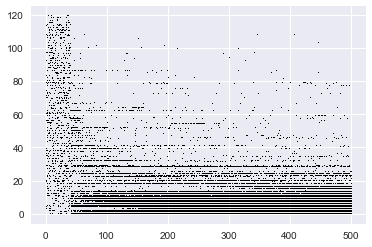

In [88]:
plt.plot(range(1,501),rank,'k,', markersize=1)
plt.savefig('plots/TSdotplot', dpi=100)

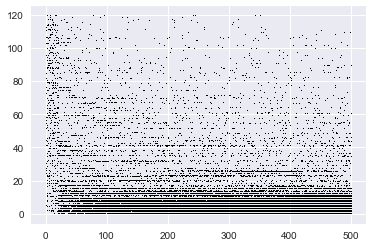

In [89]:
rank=dotpicture(filename="TSe4-120v20",iternum=i)
plt.plot(range(1,501),rank,'k,', markersize=1)
plt.savefig('plots/TSe4dotplot', dpi=100)

In [90]:

rank=dotpicture(filename="newTSregthres-120v20k10",iternum=i)

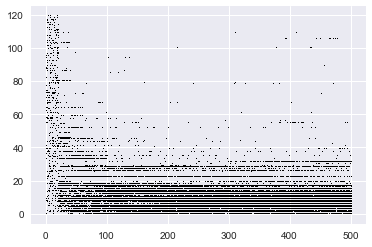

In [91]:
plt.plot(range(1,501),rank,'k,', markersize=1)
plt.savefig('plots/TSthresk10dotplot', dpi=100)

In [92]:
rank=dotpicture(filename="newTSthres-120v20k10",iternum=i)

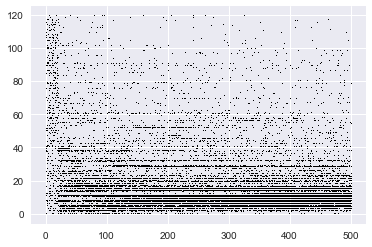

In [93]:
plt.plot(range(1,501),rank,'k,', markersize=1)
plt.savefig('plots/TSedthresk10dotplot', dpi=100)

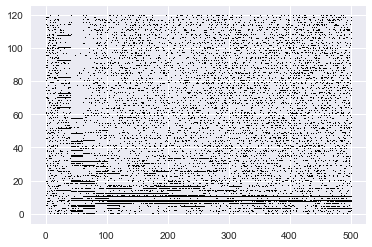

In [94]:
rank=dotpicture(filename="mismin-120v20k10",iternum=i)
plt.plot(range(1,501),rank,'k,', markersize=1)
plt.savefig('plots/mismink10dotplot', dpi=100)

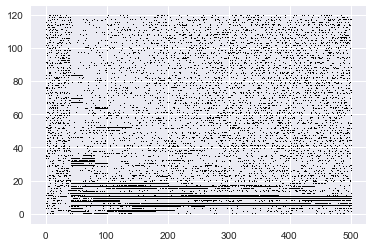

In [95]:
rank=dotpicture(filename="uncert-120v20k10",iternum=i)
plt.plot(range(1,501),rank,'k,', markersize=1)
plt.savefig('plots/uncertk10dotplot', dpi=100)

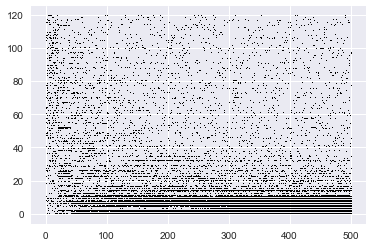

In [96]:
rank=dotpicture(filename="winapprox-120v20",iternum=i)
plt.plot(range(1,501),rank,'k,', markersize=1)
plt.savefig('plots/windotplot', dpi=100)

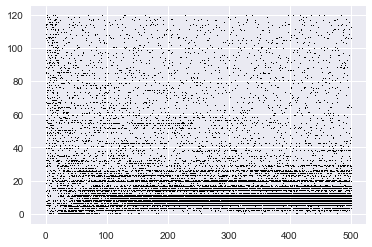

In [97]:
rank=dotpicture(filename="winapproxthres-120v20k10",iternum=i)
plt.plot(range(1,501),rank,'k,', markersize=1)
plt.savefig('plots/wink10dotplot', dpi=100)

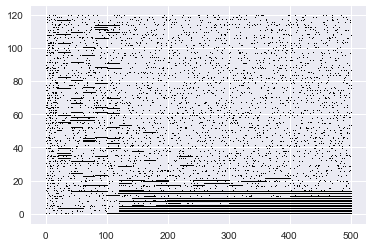

In [98]:
rank=dotpicture(filename="greedy-120v20",iternum=i)
plt.plot(range(1,501),rank,'k,', markersize=1)
plt.savefig('plots/greedydotplot', dpi=100)

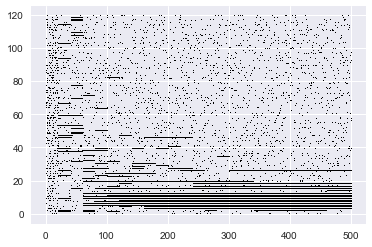

In [99]:
rank=dotpicture(filename="greedythres-120v20k10",iternum=i)
plt.plot(range(1,501),rank,'k,', markersize=1)
plt.savefig('plots/greedythresk10dotplot', dpi=100)

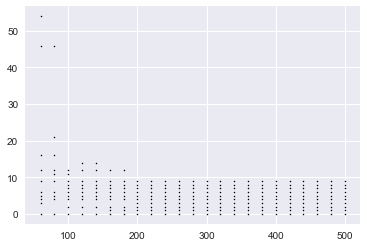

In [108]:
best=betaplot(filename="newTSregthres-120v20k10",k=10)
plt.plot(range(60,520,20),best[2:],'k.', markersize=3)
plt.savefig('plots/TSthresk10', dpi=100)

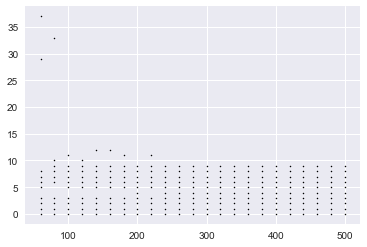

In [13]:
best=betaplot(filename="newTSthres-120v20k10",k=10,iternum=1)
plt.plot(range(60,520,20),best[2:],'k.', markersize=3)
plt.savefig('plots/TSedthresk10', dpi=100)